# Spaceship titanic

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split


In [424]:
train = pd.read_csv("C:/Users/feherdavid/Python/Spaceship_titanic/spaceship-titanic/train.csv")
test = pd.read_csv("C:/Users/feherdavid/Python/Spaceship_titanic/spaceship-titanic/test.csv")

## Data validation

In [425]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,"3,576.00",0.00,"6,715.00",49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,"1,283.00",371.00,"3,329.00",193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [426]:
for i in [train,test]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Co

In [427]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,"8,514.00","8,512.00","8,510.00","8,485.00","8,510.00","8,505.00"
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,"1,611.49",604.70,"1,136.71","1,145.72"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,"14,327.00","29,813.00","23,492.00","22,408.00","24,133.00"


In [428]:
len(train)

8693

In [429]:
print(train.shape)
print(test.shape)

(8693, 14)
(4277, 13)


In [430]:
train.groupby(by=["Cabin"]).sum()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Cabin,,,,,,,
A/0/P,52.00,0.00,"2,344.00",0.00,65.00,"6,898.00",1
A/0/S,91.00,43.00,"4,859.00",371.00,"10,044.00",242.00,0
A/1/S,67.00,279.00,605.00,"3,374.00",286.00,3.00,3
A/10/P,30.00,0.00,"3,628.00",289.00,"1,737.00","4,987.00",0
A/10/S,20.00,2.00,"4,754.00",0.00,246.00,31.00,1
...,...,...,...,...,...,...,...
T/0/P,35.00,415.00,"1,328.00",0.00,14.00,60.00,0
T/1/P,42.00,0.00,"1,829.00",2.00,"3,133.00","2,447.00",0
T/2/P,33.00,0.00,28.00,0.00,"6,841.00",543.00,0


### Transform Cabin variable

In [431]:
train[['CabinDeck','CabinNum','CabinSide']] = train['Cabin'].str.split('/', expand=True)
test[['CabinDeck','CabinNum','CabinSide']] = test['Cabin'].str.split('/', expand=True)

In [432]:
train.groupby(by=["CabinDeck"])["PassengerId"].count()

CabinDeck
A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: PassengerId, dtype: int64

CabinNum
0       18
1       15
10      12
100     12
1000     6
        ..
995      3
996      1
997      2
998      4
999      6
Name: PassengerId, Length: 1817, dtype: int64


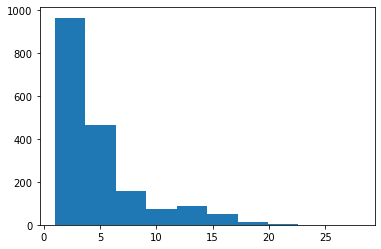

In [433]:
print(train.groupby(by=["CabinNum"])["PassengerId"].count())

plt.hist(train.groupby(by=["CabinNum"])["PassengerId"].count())
plt.show()

train["CabinNum"] = pd.to_numeric(train["CabinNum"])
test["CabinNum"] = pd.to_numeric(test["CabinNum"])

In [434]:
train.groupby(by=["CabinSide"])["PassengerId"].count()

CabinSide
P    4206
S    4288
Name: PassengerId, dtype: int64

In [435]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum
count,"8,514.00","8,512.00","8,510.00","8,485.00","8,510.00","8,505.00","8,494.00"
mean,28.83,224.69,458.08,173.73,311.14,304.85,600.37
std,14.49,666.72,"1,611.49",604.70,"1,136.71","1,145.72",511.87
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00,167.25
50%,27.00,0.00,0.00,0.00,0.00,0.00,427.00
75%,38.00,47.00,76.00,27.00,59.00,46.00,999.00
max,79.00,"14,327.00","29,813.00","23,492.00","22,408.00","24,133.00","1,894.00"


### Drop columns

In [436]:
# Drop original cabin column
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

# Drop name column
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

### Detect missing values

In [437]:
d2 = {'nulls': train.isnull().sum(), 'nullratio': train.isnull().sum()/len(train)}
pd.DataFrame(data = d2)

,nulls,nullratio
PassengerId,0,0.00
HomePlanet,201,0.02
CryoSleep,217,0.02
Destination,182,0.02
Age,179,0.02
VIP,203,0.02
RoomService,181,0.02
FoodCourt,183,0.02
ShoppingMall,208,0.02
Spa,183,0.02


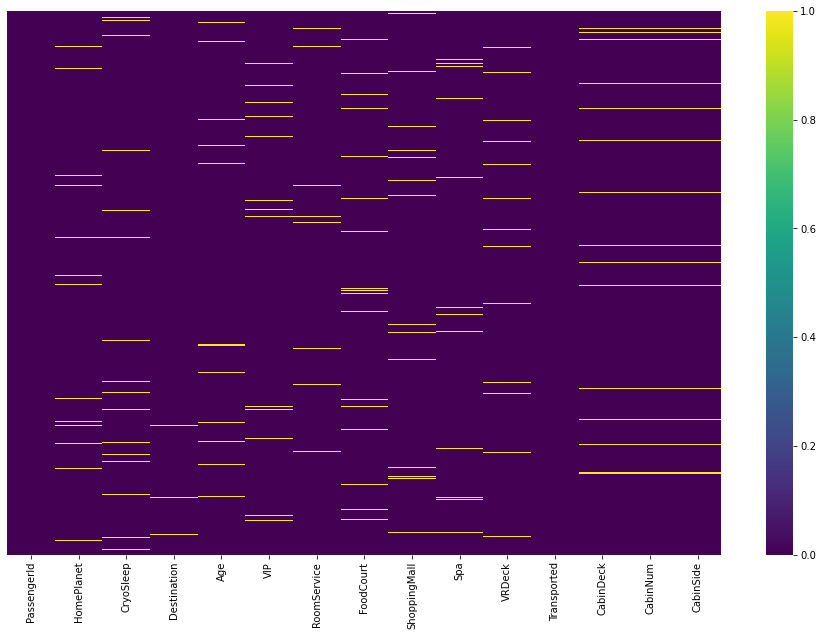

In [438]:
plt.figure(figsize=(16,10))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')
plt.show()

In [439]:
for column in train.columns:
    print(column + ':', train[column].isnull().sum(), train[column].dtype)

PassengerId: 0 object
HomePlanet: 201 object
CryoSleep: 217 object
Destination: 182 object
Age: 179 float64
VIP: 203 object
RoomService: 181 float64
FoodCourt: 183 float64
ShoppingMall: 208 float64
Spa: 183 float64
VRDeck: 188 float64
Transported: 0 bool
CabinDeck: 199 object
CabinNum: 199 float64
CabinSide: 199 object


### Correlations

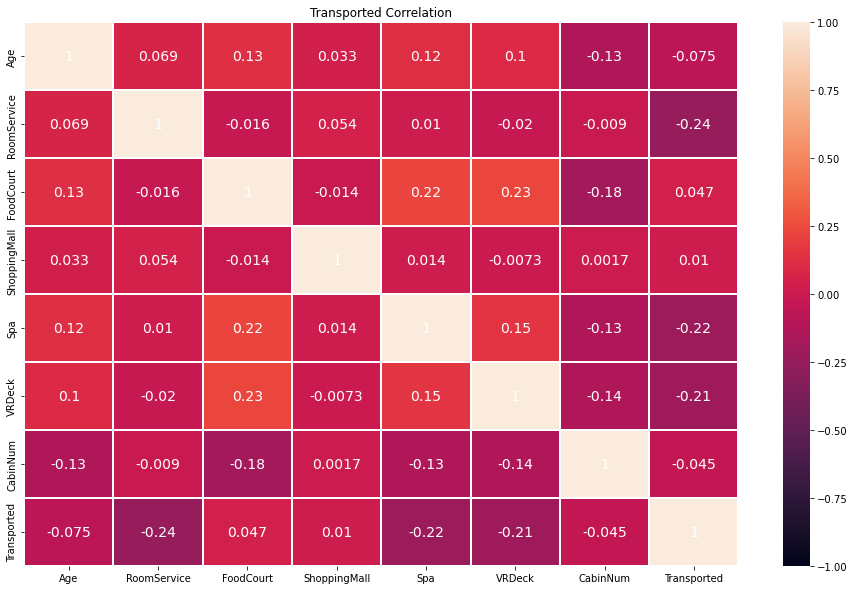

In [440]:
categorical_features = list(train.select_dtypes(include = [object]).columns)
numeric_features = list(train.select_dtypes(include = [np.int64,np.float64]).columns)
boolean_features = list(train.select_dtypes(include = [bool]).columns)

# Heatmap for correlations between numerical variables and the dependent variable
pd.options.display.float_format = "{:,.2f}".format

corr_matrix = train[numeric_features + boolean_features].corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 14, "color": "white"},annot=True)
plt.title("Transported Correlation")
plt.show()

# The numeric variables don't seem to be correlated too much with the dependent variable

In [441]:
print(numeric_features, categorical_features)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNum'] ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']


## Handling missing values

In [442]:
# Filling in missing VIP values with False
train["VIP"].fillna(False, inplace = True)
test["VIP"].fillna(False, inplace = True)

In [443]:
# Filling in missing CryoSleep values with False
train["CryoSleep"].fillna(False, inplace = True)
test["CryoSleep"].fillna(False, inplace = True)

In [444]:
# As all columns with missing values has less than 3% missing, 
# I'm inputing the numerical missing values with the median and the categoricals with the mode

for col in categorical_features:
    train[col].fillna(train[col].mode()[0],inplace = True)
    test[col].fillna(test[col].mode()[0],inplace = True)

for col in numeric_features:
    train[col].fillna(train[col].median(),inplace = True)
    test[col].fillna(test[col].median(),inplace = True)

In [445]:
for i in [train,test]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  CabinDeck     8693 non-null   object 
 13  CabinNum      8693 non-null   float64
 14  CabinSide     8693 non-null   object 
dtypes: bool(3), float64(7), object(5)
memory usage: 840.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 

In [446]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinNum        0
CabinSide       0
dtype: int64

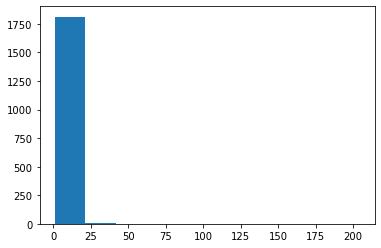

In [447]:
plt.hist(train.groupby(by=["CabinNum"])["PassengerId"].count())
plt.show()

In [448]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum
count,"8,693.00","8,693.00","8,693.00","8,693.00","8,693.00","8,693.00","8,693.00"
mean,28.79,220.01,448.43,169.57,304.59,298.26,596.40
std,14.34,660.52,"1,595.79",598.01,"1,125.56","1,134.13",506.64
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,20.00,0.00,0.00,0.00,0.00,0.00,173.00
50%,27.00,0.00,0.00,0.00,0.00,0.00,427.00
75%,37.00,41.00,61.00,22.00,53.00,40.00,983.00
max,79.00,"14,327.00","29,813.00","23,492.00","22,408.00","24,133.00","1,894.00"


### Encoding categorical vars

In [449]:
columns_to_encode = ["HomePlanet", "CryoSleep", "Destination", "VIP", "CabinDeck", "CabinSide"]

#le = LabelEncoder()

#for col in columns_to_encode:
#    train[col] = le.fit_transform(train[col])
#    test[col] = le.fit_transform(test[col])

#train_dummified = pd.get_dummies(train, columns = columns_to_encode, drop_first = True)
#test_dummified = pd.get_dummies(test, columns = columns_to_encode, drop_first = True)

enc = OrdinalEncoder()

enc.fit(train[columns_to_encode])

OrdinalEncoder()

In [450]:
enc.categories_

[array(['Earth', 'Europa', 'Mars'], dtype=object),
 array([False,  True]),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object),
 array([False,  True]),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object),
 array(['P', 'S'], dtype=object)]

In [451]:
train[columns_to_encode] = enc.transform(train[columns_to_encode])
test[columns_to_encode] = enc.transform(test[columns_to_encode])

In [452]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,0001_01,1.00,0.00,2.00,39.00,0.00,0.00,0.00,0.00,0.00,0.00,False,1.00,0.00,0.00
1,0002_01,0.00,0.00,2.00,24.00,0.00,109.00,9.00,25.00,549.00,44.00,True,5.00,0.00,1.00
2,0003_01,1.00,0.00,2.00,58.00,1.00,43.00,"3,576.00",0.00,"6,715.00",49.00,False,0.00,0.00,1.00
3,0003_02,1.00,0.00,2.00,33.00,0.00,0.00,"1,283.00",371.00,"3,329.00",193.00,False,0.00,0.00,1.00
4,0004_01,0.00,0.00,2.00,16.00,0.00,303.00,70.00,151.00,565.00,2.00,True,5.00,1.00,1.00
